In [1]:
import nfl_data_py as nfl
import pandas as pd
import matplotlib.pyplot as plt
import os
import urllib.request
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from adjustText import adjust_text

In [2]:
team_color = {'ARI':'#97233F','ATL':'#A71930','BAL':'#241773','BUF':'#00338D','CAR':'#0085CA','CHI':'#00143F',
          'CIN':'#FB4F14','CLE':'#FB4F14','DAL':'#B0B7BC','DEN':'#002244','DET':'#046EB4','GB':'#24423C',
          'HOU':'#C9243F','IND':'#003D79','JAX':'#136677','KC':'#CA2430','LAR':'#002147','LAC':'#2072BA',
          'MIA':'#0091A0','MIN':'#4F2E84','NE':'#0A2342','NO':'#A08A58','NYG':'#192E6C','NYJ':'#203731',
          'LV':'#C4C9CC','PHI':'#014A53','PIT':'#FFC20E','SEA':'#7AC142','SF':'#C9243F','TB':'#D40909',
          'TEN':'#4095D1','WAS':'#FFC20F'}

In [12]:
import_data = nfl.import_weekly_data([2022])             
rb_data = pd.DataFrame(index = import_data.index)
rb_data["Player"] = import_data["player_name"]
rb_data["Team"] = import_data["recent_team"]
rb_data["Position"] = import_data["position"]
rb_data["Week"] = import_data["week"]
rb_data["Carries"] = import_data["carries"]
rb_data["Rushing Yards"] = import_data["rushing_yards"]
rb_data["Rushing TDs"] = import_data["rushing_tds"]
rb_data["Fumbles"] = import_data["rushing_fumbles"]
rb_data["Fumbles Lost"] = import_data["rushing_fumbles_lost"]
rb_data["Rushing 1st Downs"] = import_data["rushing_first_downs"]
rb_data["Rushing EPA"] = import_data["rushing_epa"]
rb_data["Rushing 2Pt Conversions"] = import_data["rushing_2pt_conversions"]
rb_data["Player Full Name"] = import_data["player_display_name"]
rb_data = rb_data.loc[(rb_data["Carries"] >= 5) & (rb_data["Week"] == 1), :]
rb_data = rb_data.sort_values(by=['Team'])
rb_data.loc[rb_data["Team"] == "LA", "Team"] = "LAR"
rb_data

Downcasting floats.


,Player,Team,Position,Week,Carries,Rushing Yards,Rushing TDs,Fumbles,Fumbles Lost,Rushing 1st Downs,Rushing EPA,Rushing 2Pt Conversions,Player Full Name
193,K.Murray,ARI,QB,1,5,29.0,0,0.0,0.0,1.0,0.523658,0,Kyler Murray
101,J.Conner,ARI,RB,1,10,26.0,1,1.0,0.0,3.0,-0.850391,0,James Conner
25,C.Patterson,ATL,RB,1,22,120.0,1,0.0,0.0,10.0,2.395266,0,Cordarrelle Patterson
61,M.Mariota,ATL,QB,1,12,72.0,1,2.0,1.0,3.0,-1.745047,0,Marcus Mariota
166,L.Jackson,BAL,QB,1,6,17.0,0,0.0,0.0,2.0,0.259624,0,Lamar Jackson
...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,R.White,TB,RB,1,6,14.0,0,0.0,0.0,1.0,-0.960955,0,Rachaad White
110,L.Fournette,TB,RB,1,21,127.0,0,0.0,0.0,6.0,1.984909,0,Leonard Fournette
69,D.Henry,TEN,RB,1,21,82.0,0,1.0,0.0,1.0,-4.733182,0,Derrick Henry
73,C.Wentz,WAS,QB,1,6,12.0,0,0.0,0.0,0.0,0.314388,0,Carson Wentz


In [13]:
rb_data_ngs = pd.read_csv("../Resources/ngs_2022_rushing.csv")
rb_data_ngs = rb_data_ngs.loc[rb_data_ngs["week"] == 1, :]
rb_data_ngs = rb_data_ngs.sort_values(by=['team_abbr'])
rb_data_ngs = rb_data_ngs.drop_duplicates(subset=['player_display_name'])
rb_data_full = rb_data_ngs.merge(rb_data, left_on='player_display_name', right_on='Player Full Name')
rb_data_full = rb_data_full.drop(columns = ["season", "season_type", "player_first_name", "player_last_name", "player_jersey_number"])
rb_data_full.columns

Index(['week', 'player_display_name', 'player_position', 'team_abbr',
       'efficiency', 'percent_attempts_gte_eight_defenders', 'avg_time_to_los',
       'rush_attempts', 'rush_yards', 'expected_rush_yards',
       'rush_yards_over_expected', 'avg_rush_yards',
       'rush_yards_over_expected_per_att', 'rush_pct_over_expected',
       'rush_touchdowns', 'player_gsis_id', 'player_short_name', 'Player',
       'Team', 'Position', 'Week', 'Carries', 'Rushing Yards', 'Rushing TDs',
       'Fumbles', 'Fumbles Lost', 'Rushing 1st Downs', 'Rushing EPA',
       'Rushing 2Pt Conversions', 'Player Full Name'],
      dtype='object')

In [14]:
rb_data_full = rb_data_full.reset_index()
rb_data_full = rb_data_full.drop(columns = ["index"])
#rb_data_full = rb_data_full.drop(columns = ["level_0"])
rb_data_full

,week,player_display_name,player_position,team_abbr,efficiency,percent_attempts_gte_eight_defenders,avg_time_to_los,rush_attempts,rush_yards,expected_rush_yards,...,Week,Carries,Rushing Yards,Rushing TDs,Fumbles,Fumbles Lost,Rushing 1st Downs,Rushing EPA,Rushing 2Pt Conversions,Player Full Name
0,1,James Conner,RB,ARI,5.930769,10.000000,2.445889,10,26,35.285705,...,1,10,26.0,1,1.0,0.0,3.0,-0.850391,0,James Conner
1,1,Cordarrelle Patterson,RB,ATL,3.188333,13.636364,2.646762,22,120,111.015090,...,1,22,120.0,1,0.0,0.0,10.0,2.395266,0,Cordarrelle Patterson
2,1,Kenyan Drake,RB,BAL,5.172581,27.272727,3.158889,11,31,45.187656,...,1,11,31.0,0,0.0,0.0,1.0,-3.530447,0,Kenyan Drake
3,1,Christian McCaffrey,RB,CAR,3.297576,30.000000,2.341444,10,33,40.570818,...,1,10,33.0,1,0.0,0.0,3.0,0.885997,0,Christian McCaffrey
4,1,David Montgomery,RB,CHI,8.120385,47.058824,3.049733,17,26,55.776341,...,1,17,26.0,0,0.0,0.0,0.0,-10.677238,0,David Montgomery
5,1,Joe Mixon,RB,CIN,4.657805,7.407407,2.930136,27,82,88.783657,...,1,27,82.0,0,0.0,0.0,2.0,-6.061119,0,Joe Mixon
6,1,Nick Chubb,RB,CLE,3.379787,22.727273,3.221143,22,141,89.472034,...,1,22,141.0,0,0.0,0.0,6.0,4.899972,0,Nick Chubb
7,1,Kareem Hunt,RB,CLE,3.810000,45.454545,2.911900,11,46,34.478767,...,1,11,46.0,1,0.0,0.0,3.0,0.836340,0,Kareem Hunt
8,1,Ezekiel Elliott,RB,DAL,3.647885,10.000000,2.817900,10,52,51.420531,...,1,10,52.0,0,0.0,0.0,3.0,1.222174,0,Ezekiel Elliott
9,1,Melvin Gordon,RB,DEN,3.502586,8.333333,2.756400,12,58,63.637823,...,1,12,58.0,0,1.0,1.0,2.0,-4.179423,0,Melvin Gordon


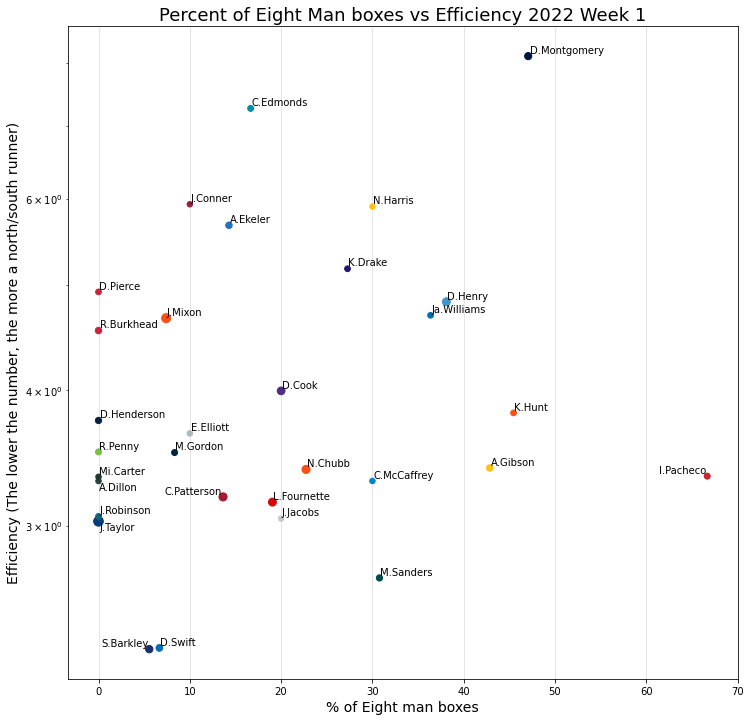

In [15]:
rb_graph = rb_data_full[["player_short_name", "percent_attempts_gte_eight_defenders", "efficiency", "team_abbr",
                         "rush_attempts"]]

x = rb_graph["percent_attempts_gte_eight_defenders"]
y = rb_graph["efficiency"]
color = []

for team in rb_graph["team_abbr"]:
    color.append(team_color[team])

size = rb_graph["rush_attempts"].to_numpy()
s = [s*3 for s in size]

#Create a figure with size 12x12
fig, ax = plt.subplots(figsize=(12,12))

#Make a scatter plot with success rate data
plt.scatter(x, y, c = color, s = s)
    
#Add a grid
ax.grid(zorder=0,alpha=.4)
ax.set_axisbelow(True)

#Adding labels and text
plt.xlabel('% of Eight man boxes', fontsize=14)
plt.ylabel('Efficiency (The lower the number, the more a north/south runner)', fontsize=14)
plt.yscale('log')
plt.title('Percent of Eight Man boxes vs Efficiency 2022 Week 1', fontsize=18)

#Add player names to points
texts = [plt.text(x[i], y[i], txt, ha='center', va='center') for i, txt in enumerate(rb_graph["player_short_name"])]    
adjust_text(texts)

#plt.savefig('Images/AvgAirYards1stDown_vs_Passing1stDown', dpi=400)
plt.show()

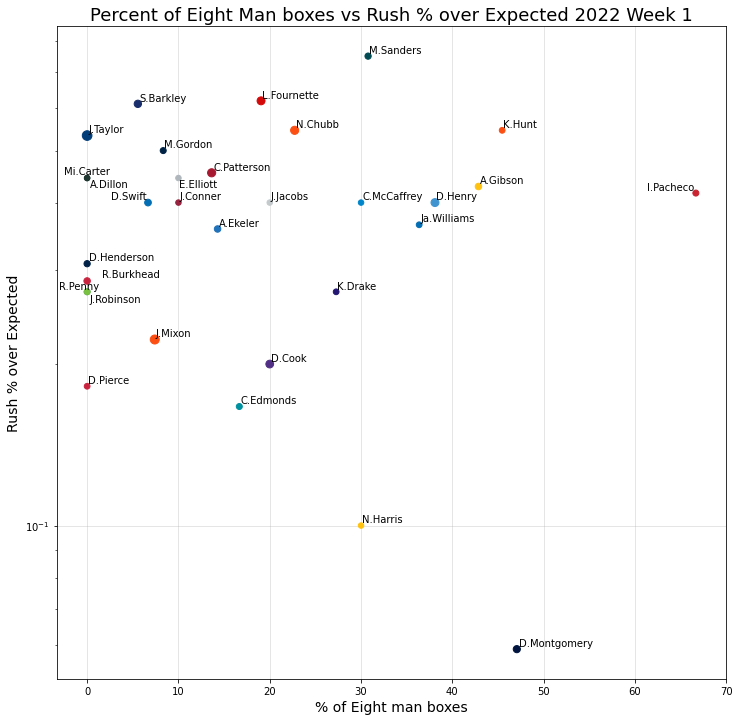

In [16]:
rb_graph = rb_data_full[["player_short_name", "percent_attempts_gte_eight_defenders", "rush_pct_over_expected",
                         "team_abbr", "rush_attempts"]]

x = rb_graph["percent_attempts_gte_eight_defenders"]
y = rb_graph["rush_pct_over_expected"]
color = []

for team in rb_graph["team_abbr"]:
    color.append(team_color[team])

size = rb_graph["rush_attempts"].to_numpy()
s = [s*3 for s in size]

#Create a figure with size 12x12
fig, ax = plt.subplots(figsize=(12,12))

#Make a scatter plot with success rate data
plt.scatter(x, y, c = color, s = s)
    
#Add a grid
ax.grid(zorder=0,alpha=.4)
ax.set_axisbelow(True)

#Adding labels and text
plt.xlabel('% of Eight man boxes', fontsize=14)
plt.ylabel('Rush % over Expected', fontsize=14)
plt.yscale('log')
plt.title('Percent of Eight Man boxes vs Rush % over Expected 2022 Week 1', fontsize=18)

#Add player names to points
texts = [plt.text(x[i], y[i], txt, ha='center', va='center') for i, txt in enumerate(rb_graph["player_short_name"])]    
adjust_text(texts)

#plt.savefig('Images/AvgAirYards1stDown_vs_Passing1stDown', dpi=400)
plt.show()

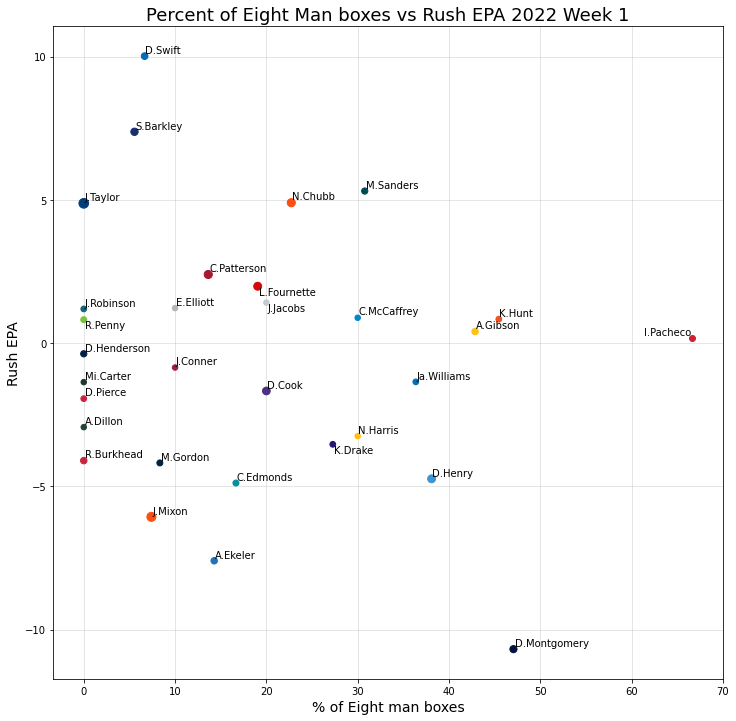

In [17]:
rb_graph = rb_data_full[["player_short_name", "percent_attempts_gte_eight_defenders", "Rushing EPA",
                         "team_abbr", "rush_attempts"]]

x = rb_graph["percent_attempts_gte_eight_defenders"]
y = rb_graph["Rushing EPA"]
color = []

for team in rb_graph["team_abbr"]:
    color.append(team_color[team])

size = rb_graph["rush_attempts"].to_numpy()
s = [s*3 for s in size]

#Create a figure with size 12x12
fig, ax = plt.subplots(figsize=(12,12))

#Make a scatter plot with success rate data
plt.scatter(x, y, c = color, s = s)
    
#Add a grid
ax.grid(zorder=0,alpha=.4)
ax.set_axisbelow(True)

#Adding labels and text
plt.xlabel('% of Eight man boxes', fontsize=14)
plt.ylabel('Rush EPA', fontsize=14)
#plt.yscale('log')
plt.title('Percent of Eight Man boxes vs Rush EPA 2022 Week 1', fontsize=18)

#Add player names to points
texts = [plt.text(x[i], y[i], txt, ha='center', va='center') for i, txt in enumerate(rb_graph["player_short_name"])]    
adjust_text(texts)

#plt.savefig('Images/AvgAirYards1stDown_vs_Passing1stDown', dpi=400)
plt.show()